# Задание 1

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

In [141]:
data = pd.read_excel('/content/test_task_trainee.xlsx', header=3, sheet_name='task1', index_col=0)
data = data.iloc[:20]

Корреляция Пирсона

In [143]:
x = data['Средняя зарплата']
y = data['Количество увольнений за год']
corr, p_value = pearsonr(x, y)
print(f'Корреляция: {corr}, p-value: {p_value}')

alpha = 0.05
if p_value < alpha:
  print('Коэффициент корреляции статистически значим.')
else:
  print('Коэффициент корреляции статистически не  значим.')

Корреляция: 0.5356760200195034, p-value: 0.014921639124516694
Коэффициент корреляции статистически значим.


In [144]:
# 2. Построение линейной регрессии
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
X = sm.add_constant(x, prepend=False)
res = sm.OLS(y, X).fit()

print(res.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Количество увольнений за год   R-squared:                       0.287
Model:                                      OLS   Adj. R-squared:                  0.247
Method:                           Least Squares   F-statistic:                     7.244
Date:                          Thu, 21 Nov 2024   Prob (F-statistic):             0.0149
Time:                                  22:44:13   Log-Likelihood:                -108.24
No. Observations:                            20   AIC:                             220.5
Df Residuals:                                18   BIC:                             222.5
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

R^2 = 0.287
Значит, только 28.7% количества увольнений объясняются заработной платой, и есть другие важные факторы, которые не включены в модель.  Значение довольно низкое, след-но, зарплата только частично влияет на увольнения среди предприятий

Text(0, 0.5, 'Количество увольнений за год')

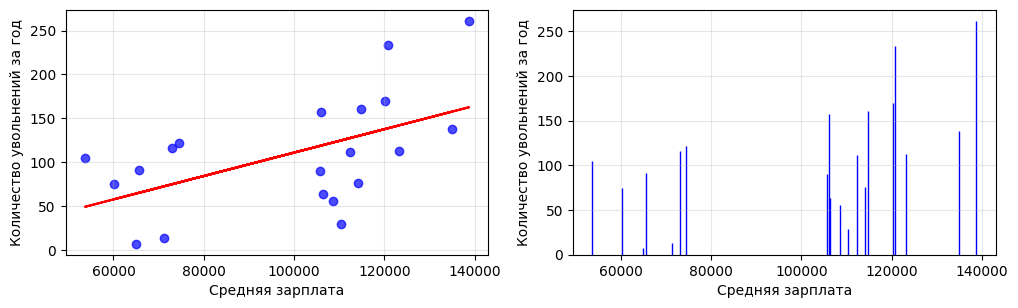

In [145]:


plt.figure(figsize=(12, 7))

plt.subplot(2,2,1)
plt.scatter(x, y, alpha=0.7, color="blue")
plt.grid(alpha=0.3)
plt.xlabel('Средняя зарплата')
plt.ylabel('Количество увольнений за год')
# Линия тренда
coefficients = np.polyfit(x, y, 1)
line = np.poly1d(coefficients)
plt.plot(x, line(x), color="red", linestyle="-")

plt.subplot(2,2,2)
plt.bar(x, y, edgecolor='blue')
plt.grid(alpha=0.3)
plt.xlabel('Средняя зарплата')
plt.ylabel('Количество увольнений за год')



# Задание 2

In [146]:
data = pd.read_excel('/content/test_task_trainee.xlsx', sheet_name='task2_data')

In [147]:
# доп колонка с метрикой numerator/denominator
data["metric"] = data["numerator"] / data["denominator"]

# разделение складов по городам
grouped = data.groupby("city_id")


In [148]:
from scipy.stats import shapiro, norm
metric_data = data
stat, p = shapiro(metric_data)

alpha = 0.05
if p > alpha:
    print("Нормальное распределение.")
else:
    print("Не нормальное распределение.")

Не нормальное распределение.


In [149]:

results = pd.DataFrame()
# функция для разбиения складов внутри каждой группы
def split_group(group):
    group = group.sample(frac=1, random_state=42)  # Перемешиваем данные для случайности
    group_size = len(group)
    group["group"] = ["A" if i < group_size / 2 else "B" for i in range(group_size)]
    return group

In [150]:

#  разбиение для каждой групаы
for city, group in grouped:
    stratified_group = split_group(group)
    results = pd.concat([results, stratified_group], ignore_index=True)
results = results.sort_values(by=["id"])

results

,id,city_id,date,denominator,numerator,metric,group
53079,000fade4-e8dc-11ed-b10a-08c0eb31fffb,f3a43361-a0a8-4537-82a1-69c8c25a5c11,2024-03-29,162,47,0.290123,A
53125,000fade4-e8dc-11ed-b10a-08c0eb31fffb,f3a43361-a0a8-4537-82a1-69c8c25a5c11,2024-03-24,264,156,0.590909,A
53117,000fade4-e8dc-11ed-b10a-08c0eb31fffb,f3a43361-a0a8-4537-82a1-69c8c25a5c11,2024-03-11,249,162,0.650602,A
53489,000fade4-e8dc-11ed-b10a-08c0eb31fffb,f3a43361-a0a8-4537-82a1-69c8c25a5c11,2024-03-28,218,98,0.449541,B
53235,000fade4-e8dc-11ed-b10a-08c0eb31fffb,f3a43361-a0a8-4537-82a1-69c8c25a5c11,2024-03-06,230,125,0.543478,A
...,...,...,...,...,...,...,...
52784,ffc39ff7-2cbe-11ec-a0ee-ec0d9a21b021,f2beb6a4-9e54-4e96-bd28-3011bad246f2,2024-03-08,323,84,0.260062,B
52910,ffc39ff7-2cbe-11ec-a0ee-ec0d9a21b021,f2beb6a4-9e54-4e96-bd28-3011bad246f2,2024-03-13,295,122,0.413559,B
52535,ffc39ff7-2cbe-11ec-a0ee-ec0d9a21b021,f2beb6a4-9e54-4e96-bd28-3011bad246f2,2024-03-02,335,136,0.405970,A
52742,ffc39ff7-2cbe-11ec-a0ee-ec0d9a21b021,f2beb6a4-9e54-4e96-bd28-3011bad246f2,2024-03-01,290,101,0.348276,A


In [151]:

# daily_unique_warehouses = data.groupby('date')['id'].nunique()

# average_daily_warehouses = daily_unique_warehouses.mean()
# average_daily_warehouses